In [25]:
import networkx as nx
import matplotlib.pyplot as plt
import time
from itertools import combinations
import os

In [35]:
# Create output directories
import os
input_dir = "sample_data"
output_dir = "VC_Output"
output_dir2 = "VC_Output2"
os.makedirs(output_dir, exist_ok=True)

#Used gemini for generating subset using combinations function

In [27]:
# creating vertex cover of the following graph
def is_vertex_cover(G, vertices):
    # Check if all edges are covered by the given vertex set
    for u, v in G.edges():
        if u not in vertices and v not in vertices:
            return False
    return True

#initiating brute force to find vertex cover which will find all the possible value and send us the best value
def brute_force_vertex_cover(G):
    nodes = list(G.nodes())
    n = len(nodes)

    # Try all subsets in increasing order of size
    for r in range(n + 1):
        for subset in combinations(nodes, r):
            if is_vertex_cover(G, subset):
                return set(subset)
    return set()

In [28]:
def compute_vertex_cover_runtime(G):
    # vertex cover computation time
    start_time = time.time()
    vertex_cover = brute_force_vertex_cover(G)
    end_time = time.time()
    runtime = end_time - start_time
    return runtime

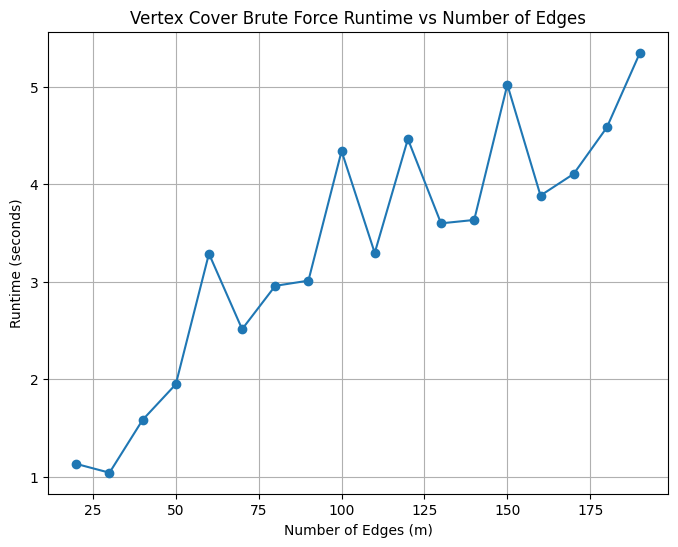

In [44]:
# Parameters
n = 20
m_values = [20, 30, 40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190]
brute_force_runtimes = [] # List to store runtime values for brute force
vc_size = []

for m in m_values:
    # Read graph from input file
    input_file = os.path.join(input_dir, f"Graph_with_nodes_{n}_edges_{m}.txt")
    G = nx.Graph()
    with open(input_file, "r") as f:
        for line in f:
            u, v = map(int, line.split())
            G.add_edge(u, v)

    # Compute vertex cover and runtime for the graph
    vertex_cover = brute_force_vertex_cover(G)
    runtime = compute_vertex_cover_runtime(G)
    brute_force_runtimes.append(runtime) # Store the runtime

    # Save output
    output_file = os.path.join(output_dir, f"Output_of_Graph_with_nodes_{n}_edges_{m}.txt")
    with open(output_file, "w") as f:
        f.write(f"Vertex Cover Size: {len(vertex_cover)}\n")
        f.write(f"Running Time: {runtime:.6f} seconds\n")
        f.write(f"Vertex Cover: {sorted(vertex_cover)}\n")


    vc_size.append(len(vertex_cover))


# Plot runtime vs number of edges
plt.figure(figsize=(8, 6))
plt.plot(m_values, brute_force_runtimes, marker='o')
plt.xlabel("Number of Edges (m)")
plt.ylabel("Runtime (seconds)")
plt.title("Vertex Cover Brute Force Runtime vs Number of Edges")
plt.grid(True)
plt.show()
plt.close()

# Vertex Cover Algorithm (2 factor- approximation algorithm)

In [30]:
def maximal_matching(graph):
    matching = set()
    # Create a copy of edges to iterate over, as edges will be removed
    edges = list(graph.edges())
    for u, v in edges:
        # If neither u nor v is already covered by an edge in the matching
        if u not in set(sum(matching, ())) and v not in set(sum(matching, ())):
            matching.add((u, v))
    return matching

def two_fac_vertex_cover(matching):
    vertex_cover = set()
    for u, v in matching:
        vertex_cover.add(u)
        vertex_cover.add(v)
    return vertex_cover

In [32]:
def compute_vertex_cover_runtime2(G):
    # vertex cover computation time
    start_time = time.time()
    matching = maximal_matching(G)
    vertex_cover = two_fac_vertex_cover(matching)
    end_time = time.time()
    runtime = end_time - start_time
    return runtime

#used Gemini to read the input file and visualise the graph

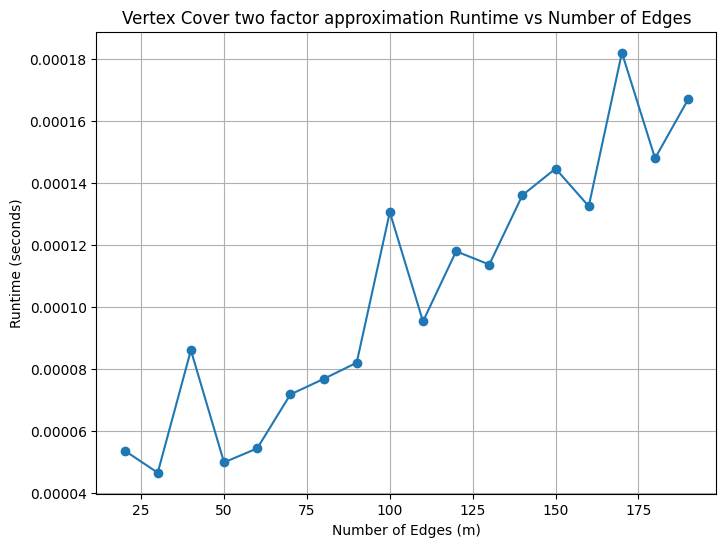

In [42]:
# Parameters
# Parameters
n = 20
m_values = [20, 30, 40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190]
runtimes1 = [] # List to store runtime values for the second algorithm
vc_size1 = []

# Create output directory for the second algorithm
os.makedirs(output_dir2, exist_ok=True)


for m in m_values:
    # Read graph from input file
    input_file = os.path.join('/content/sample_data', f"Graph_with_nodes_{n}_edges_{m}.txt")
    G = nx.Graph()
    with open(input_file, "r") as f:
        for line in f:
            u, v = map(int, line.split())
            G.add_edge(u, v)

    # Compute vertex cover and runtime for the graph
    matching = maximal_matching(G)
    vertex_cover = two_fac_vertex_cover(matching)
    runtime1 = compute_vertex_cover_runtime2(G)
    runtimes1.append(runtime1) # Store the runtime for the second algorithm

    matching_edges = list(matching) # Convert set of tuples to list of tuples




    # Save output
    output_file = os.path.join(output_dir2, f"Output_of_Graph_with_nodes_{n}_edges_{m}.txt")
    with open(output_file, "w") as f:
        f.write(f"Vertex Cover Size: {len(vertex_cover)}\n")
        f.write(f"Running Time: {runtime1:.6f} seconds\n")
        f.write(f"Vertex Cover: {sorted(vertex_cover)}\n")



    vc_size1.append(len(vertex_cover))






# Plot runtime vs number of edges
plt.figure(figsize=(8, 6))
plt.plot(m_values, runtimes1, marker='o')
plt.xlabel("Number of Edges (m)")
plt.ylabel("Runtime (seconds)")
plt.title("Vertex Cover two factor approximation Runtime vs Number of Edges")
plt.grid(True)
plt.show()
plt.close()

Approximation factor for 20 nodes and 20 edges = 1.8

Approximation factor for 20 nodes and 30 edges = 1.6

Approximation factor for 20 nodes and 40 edges = 1.6363636363636365

Approximation factor for 20 nodes and 50 edges = 1.3333333333333333

Approximation factor for 20 nodes and 60 edges = 1.2307692307692308

Approximation factor for 20 nodes and 70 edges = 1.3846153846153846

Approximation factor for 20 nodes and 80 edges = 1.4285714285714286

Approximation factor for 20 nodes and 90 edges = 1.2857142857142858

Approximation factor for 20 nodes and 100 edges = 1.3333333333333333

Approximation factor for 20 nodes and 110 edges = 1.2

Approximation factor for 20 nodes and 120 edges = 1.25

Approximation factor for 20 nodes and 130 edges = 1.2

Approximation factor for 20 nodes and 140 edges = 1.3333333333333333

Approximation factor for 20 nodes and 150 edges = 1.1764705882352942

Approximation factor for 20 nodes and 160 edges = 1.1764705882352942

Approximation factor for 20 node

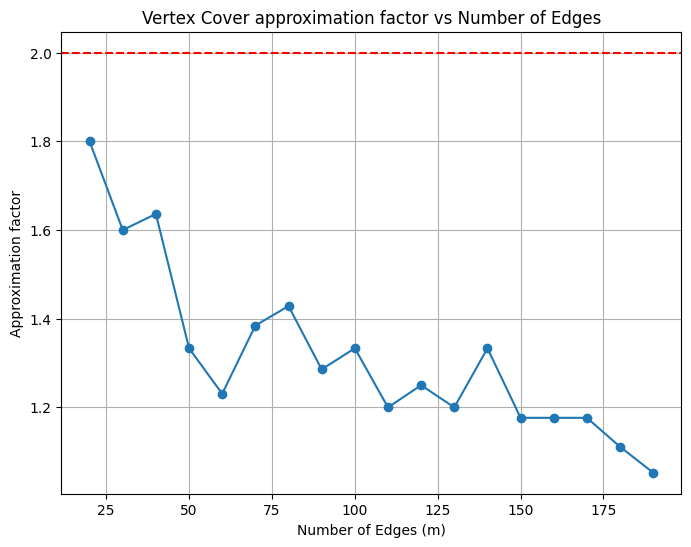

In [45]:
#calculating the approximation factor
approximation_factor = []
for i in range(0,18):
  approximation_factor.append(vc_size1[i]/vc_size[i])
  print(f"Approximation factor for {n} nodes and {m_values[i]} edges = {vc_size1[i]/vc_size[i]}\n")
approximation_factor

plt.figure(figsize=(8, 6))
plt.plot(m_values, approximation_factor, marker='o')
plt.axhline(y=2, color='r', linestyle='--', label = " Approximation Threshold")
plt.xlabel("Number of Edges (m)")
plt.ylabel("Approximation factor")
plt.title("Vertex Cover approximation factor vs Number of Edges")
plt.grid(True)
plt.show()
plt.close()


In [24]:
import pandas as pd

# Create a dictionary to hold the data
data = {
    'Number of Edges (m)': m_values,
    'Brute Force VC Size': vc_size,
    '2-Factor Approx VC Size': vc_size1,
    'Brute Force Runtime (s)': brute_force_runtimes,
    '2-Factor Approx Runtime (s)': runtimes1,
    'Approximation Factor': approximation_factor
}

# Create a pandas DataFrame
df = pd.DataFrame(data)

# Define the output filename
excel_filename = os.path.join(output_dir, f"Vertex_Cover_Comparison_n_{n}.xlsx")

# Save the DataFrame to an Excel file
df.to_excel(excel_filename, index=False)

print(f"Results saved to {excel_filename}")

Results saved to VC_Output/Vertex_Cover_Comparison_n_20.xlsx
